# Ideal Page Rank Algorithm using Power Iterations

### Note:
1. Link to self is not considered in this implementation.
2. There can be maximum two link between any two nodes.(one towards each node)

#Python Libraries Required

In [1]:
import numpy as np
import scipy.linalg as la
from matplotlib import pyplot as plt

# Graph Example

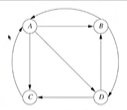

For the graph given above, the Edges & Vertices are as follows:

In [2]:
V = [1,2,3,4] # A = 1, B = 2, C = 3, D = 4 
E = [[1,2],[1,3],[1,4],[2,1],[2,4],[3,1],[4,2],[4,3]]

#Algorithm

In [66]:
def ideal_rank_PI(V,E,epsilon= 0.01):
  V = np.array(V)
  E = np.array(E)

  node_count = len(V)
  incoming = {}
  outgoing = {}
  coef = {}
  
  eq = np.zeros([node_count,node_count])
  eq_dict = {}

  print("Equation Matrix",eq)
  print("Number of Vertices : ",node_count)
  print("Vertices : ",V)


  for x in V:
    in_temp = []
    out_temp = []
    for y in E:
      
      if(x == y[1]):
        in_temp.append(y[0])
      
      if(x == y[0]):
        out_temp.append(y[1])
    
    incoming[x] =  in_temp
    outgoing[x] =  out_temp

  print("incoming",incoming)
  print("Outgoing",outgoing)

  for x in incoming:
    temp =[]
    new =np.zeros(node_count)
    for y in incoming[x]:
      m = 1.0/len(outgoing[y])
      temp.append(m)
      new[y-1] = m
    coef[x] = temp
    eq_dict[x] = new
  
  for x in eq_dict:
    eq[x-1] += eq_dict[x]

  print("Equation Matrix : ")
  print(eq)     
  
  r_old = np.zeros(node_count)
  r_old[0] = 1
  r_new = np.matmul(eq,r_old)

  while la.norm(r_new - r_old)>epsilon:
    r_old = r_new
    r_new = np.matmul(eq,r_old)
    print("ranks",r_new)
  return r_new

In [67]:
ideal_rank_PI(V,E,0.0001)

Equation Matrix [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Number of Vertices :  4
Vertices :  [1 2 3 4]
incoming {1: [2, 3], 2: [1, 4], 3: [1, 4], 4: [1, 2]}
Outgoing {1: [2, 3, 4], 2: [1, 4], 3: [1], 4: [2, 3]}
Equation Matrix : 
[[0.         0.5        1.         0.        ]
 [0.33333333 0.         0.         0.5       ]
 [0.33333333 0.         0.         0.5       ]
 [0.33333333 0.5        0.         0.        ]]
ranks [0.5        0.16666667 0.16666667 0.16666667]
ranks [0.25 0.25 0.25 0.25]
ranks [0.375      0.20833333 0.20833333 0.20833333]
ranks [0.3125     0.22916667 0.22916667 0.22916667]
ranks [0.34375 0.21875 0.21875 0.21875]
ranks [0.328125   0.22395833 0.22395833 0.22395833]
ranks [0.3359375  0.22135417 0.22135417 0.22135417]
ranks [0.33203125 0.22265625 0.22265625 0.22265625]
ranks [0.33398438 0.22200521 0.22200521 0.22200521]
ranks [0.33300781 0.22233073 0.22233073 0.22233073]
ranks [0.33349609 0.22216797 0.22216797 0.22216797]
ranks [0.33325195 0.22224

array([0.33331299, 0.222229  , 0.222229  , 0.222229  ])